<a href="https://colab.research.google.com/github/ishitaadwivedii/VisionTouch/blob/main/loan2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load dataset
df = pd.read_csv('Loan_Train.csv')

# Check first few rows
print(df.head())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [ ]:
# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Check for missing values
print(df.isnull().sum())

# Handle missing values by filling with the mode (most frequent) for categorical features
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

# Encode categorical variables (e.g., Loan_Status, Gender, Married, etc.)
label_encoders = {}
for column in ['Loan_Status', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Check the cleaned data
print(df.head())


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
    Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0  LP001002       1        0          0          0              0   
1  LP001003       1        1          1          0              0   
2  LP001005       1        1          0          0              1   
3  LP001006       1        1          0          1              0   
4  LP001008       1        0          0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0  146.412162             360.0   
1             4583             1508.0  128.000000             360.0   
2             3000                0.0   66.0000

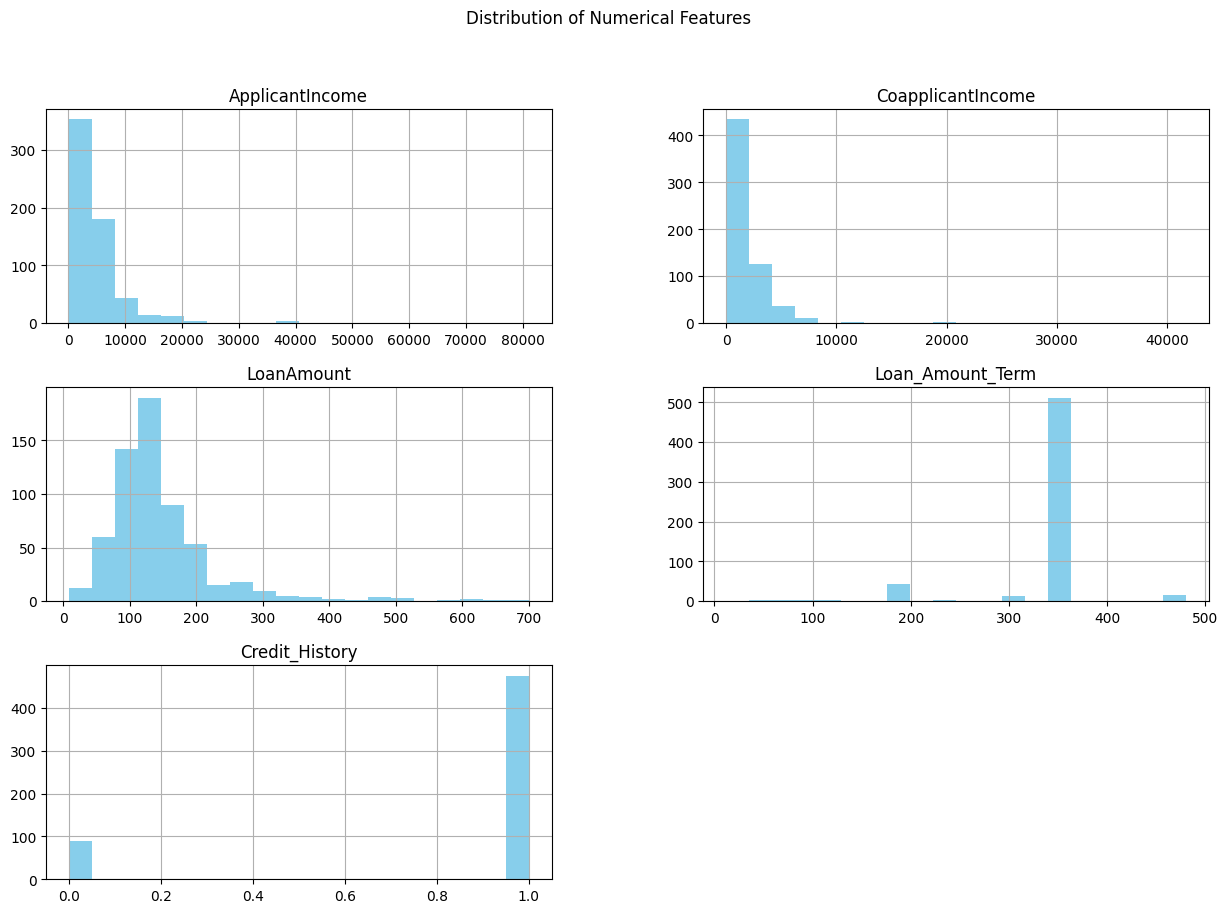

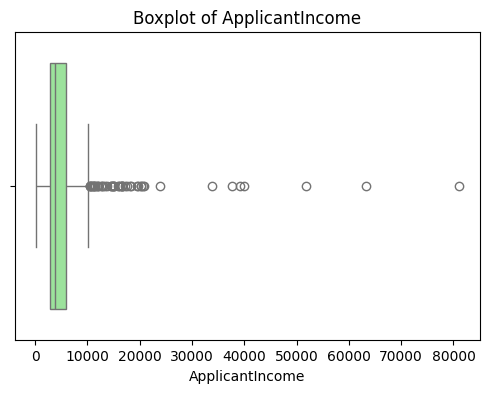

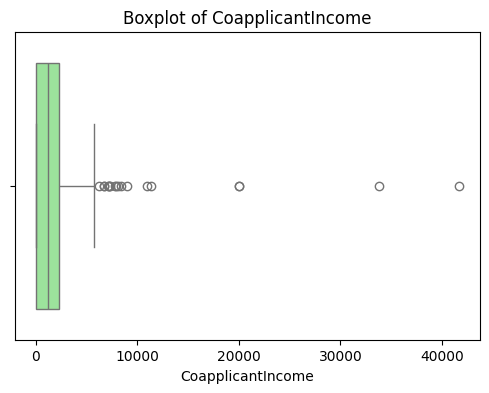

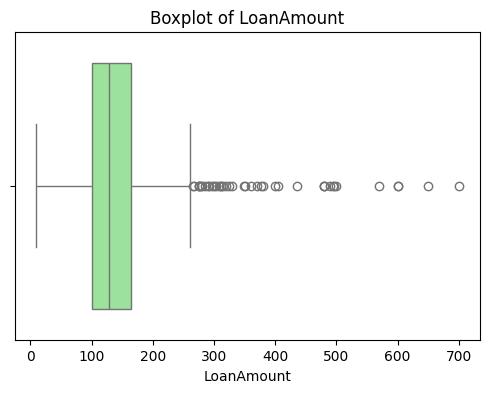

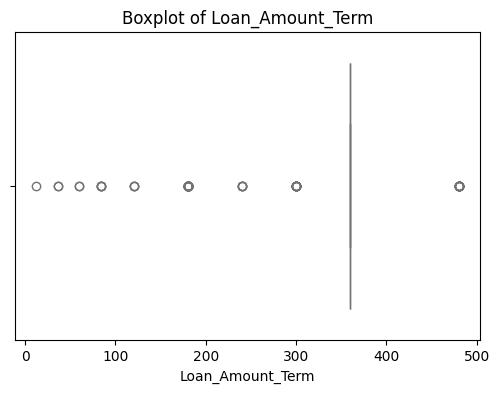

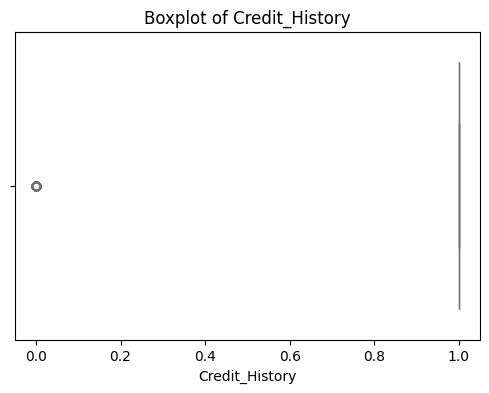

In [ ]:
# Plot histograms for numerical features
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
df[numerical_features].hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Plot boxplots for numerical features to check for outliers
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=feature, color='lightgreen')
    plt.title(f'Boxplot of {feature}')
    plt.show()


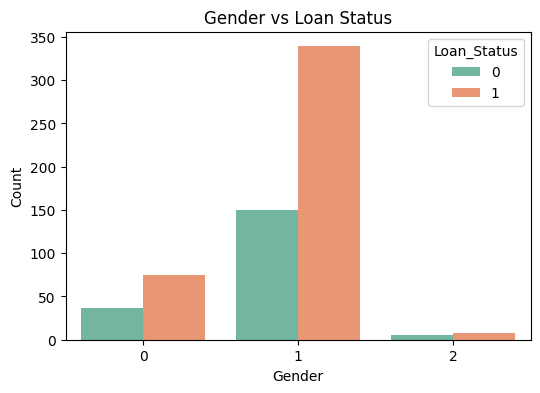

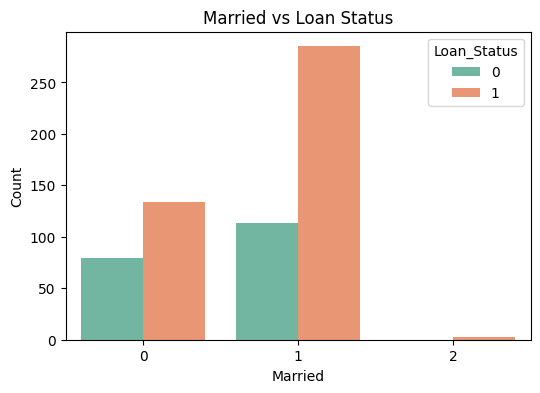

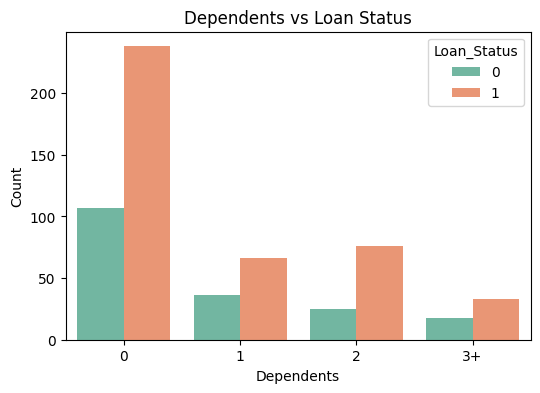

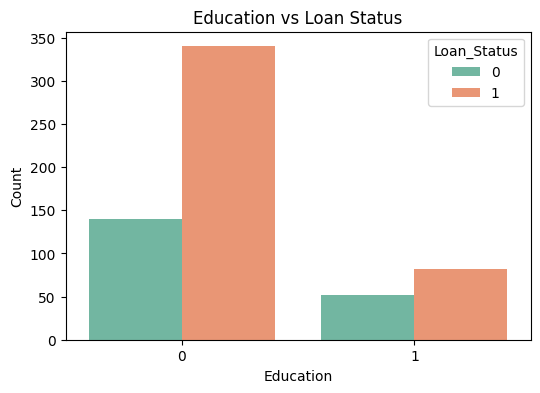

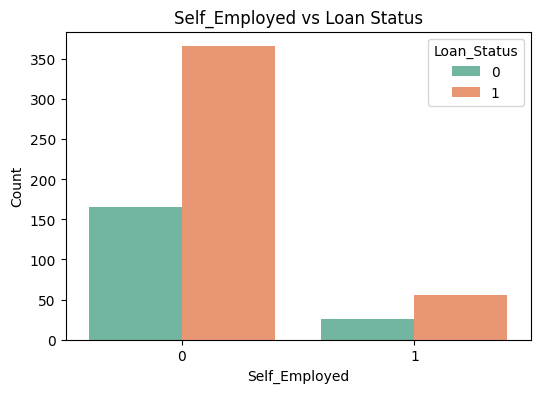

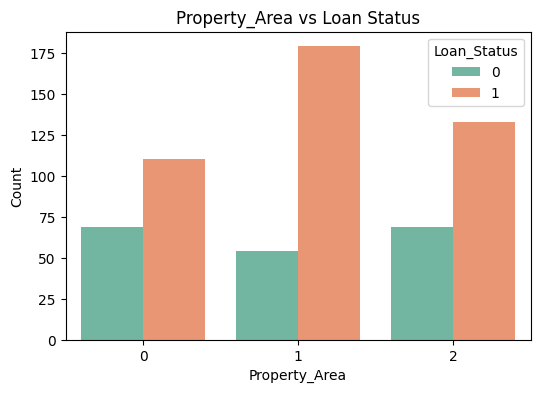

In [ ]:
# Plot countplot for categorical features with hue='Loan_Status'
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=feature, hue='Loan_Status', palette='Set2')
    plt.title(f'{feature} vs Loan Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


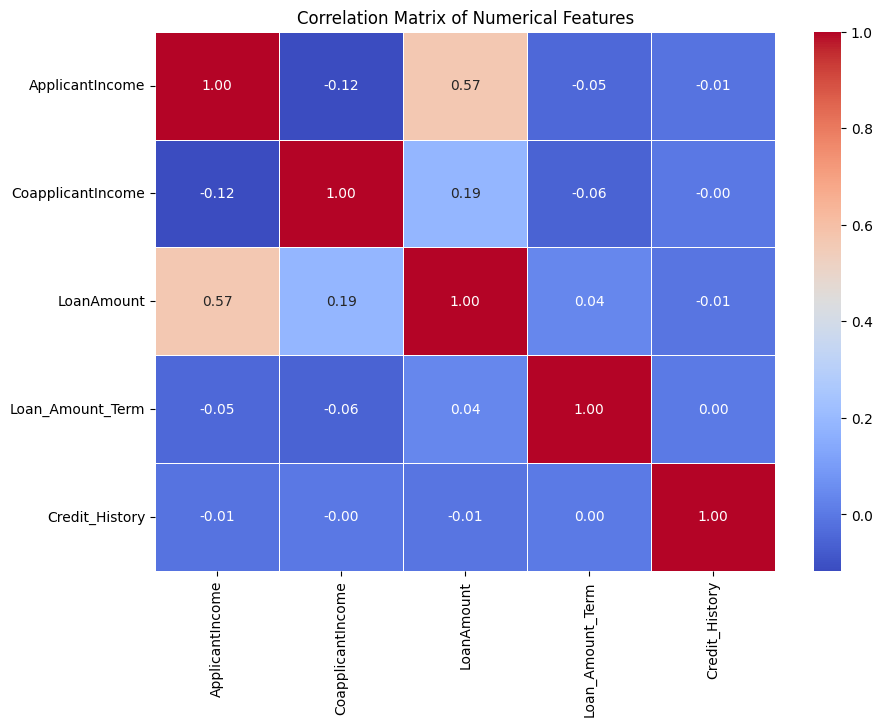

In [ ]:
# Compute the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


C:\Users\acer\AppData\Local\Temp\ipykernel_28252\1205261296.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Loan_Status', palette='Set1')


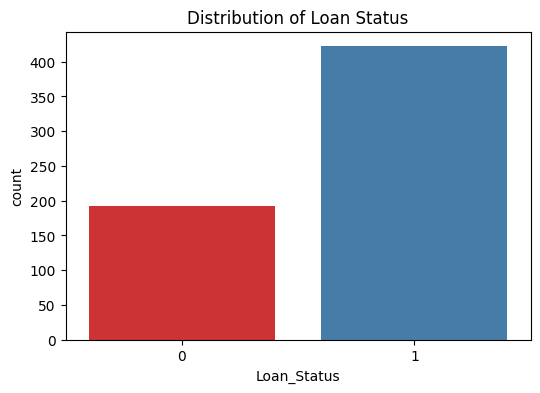

Loan_Status
1    422
0    192
Name: count, dtype: int64


In [ ]:
# Plot the distribution of Loan_Status
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Loan_Status', palette='Set1')
plt.title('Distribution of Loan Status')
plt.show()

# Check the class balance
loan_status_counts = df['Loan_Status'].value_counts()
print(loan_status_counts)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the dataset (make sure to replace the file path)
# df = pd.read_csv('path_to_your_file.csv')

# Drop the non-numeric columns such as Loan_ID, as they are not useful for scaling
df = df.drop('Loan_ID', axis=1)

# Separate features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Handle missing values by filling them with a placeholder (for now, fill categorical with 'missing' and numeric with the median)
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create a preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing numeric data
    ('scaler', StandardScaler())                   # Scale numeric data
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing categorical data
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical data
])

# Use ColumnTransformer to apply the correct transformation to each column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the transformer to the training data and transform both the training and test sets
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


# Now X_train_transformed and X_test_transformed are ready for model training


In [ ]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Fill missing values in numeric columns with the mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# If you want to fill categorical columns (strings), use a different method like filling with the mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


Training Decision Tree...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Decision Tree: {'max_depth': 3, 'min_samples_split': 5}

Training SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for SVM: {'C': 0.1, 'kernel': 'linear'}

Training KNN...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for KNN: {'n_neighbors': 9, 'weights': 'uniform'}

Evaluating Decision Tree...
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123


Evaluating SVM...
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
     

Training Decision Tree...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Decision Tree: {'max_depth': 3, 'min_samples_split': 5}

Training SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for SVM: {'C': 0.1, 'kernel': 'linear'}

Training KNN...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for KNN: {'n_neighbors': 9, 'weights': 'uniform'}

Evaluating Decision Tree...
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123


Evaluating SVM...
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
     

Training Decision Tree...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Decision Tree: {'max_depth': 3, 'min_samples_split': 5}

Training SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for SVM: {'C': 0.1, 'kernel': 'linear'}

Training KNN...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for KNN: {'n_neighbors': 9, 'weights': 'uniform'}

Evaluating Decision Tree...
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123


Evaluating SVM...
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
     

Training Decision Tree...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Decision Tree: {'max_depth': 3, 'min_samples_split': 5}

Training SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for SVM: {'C': 0.1, 'kernel': 'linear'}

Training KNN...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for KNN: {'n_neighbors': 9, 'weights': 'uniform'}

Evaluating Decision Tree...
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123


Evaluating SVM...
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
     

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Handle missing or incorrect values (like '3+')
df.replace('3+', '3', inplace=True)  # Replace '3+' with '3' or remove it if it's irrelevant

# Convert categorical variables to string type before applying LabelEncoder
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Label encode the categorical variables
label_encoders = {}
for col in categorical_columns:
    if df[col].dtype == 'object':  # Check if the column is categorical
        df[col] = df[col].astype(str)  # Convert to string before encoding
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])  # Convert strings to labels
        label_encoders[col] = le

  # Impute missing values with mean for numerical columns

# Split data into features (X) and target (y)
X = df.drop('Loan_Status', axis=1)  # Drop target variable
y = df['Loan_Status']  # Target variable

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models and hyperparameters for grid search
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

param_grids = {
    'Decision Tree': {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }
}

# Initialize the grid search results
best_models = {}

# Loop over models and perform grid search for each
for model_name in models:
    print(f"Training {model_name}...")

    model = models[model_name]
    param_grid = param_grids[model_name]

    # Grid Search with 5-fold Cross Validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

    # Fit the model on the training data
    if model_name == 'SVM' or model_name == 'KNN':
        grid_search.fit(X_train_scaled, y_train)
    else:
        grid_search.fit(X_train, y_train)

    # Store the best model and its hyperparameters
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}\n")

# Evaluate the best models on the test set
for model_name, model in best_models.items():
    print(f"Evaluating {model_name}...")
    y_pred = model.predict(X_test_scaled if model_name != 'Decision Tree' else X_test)
    print(f"Classification Report for {model_name}:\n{classification_report(y_test, y_pred)}\n")


Evaluating Decision Tree...
Accuracy: 0.7642
Precision: 0.7525
Recall: 0.9500
F1-Score: 0.8398
--------------------------------------------------


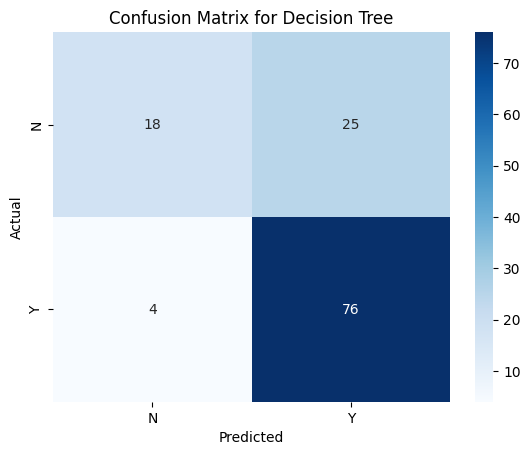

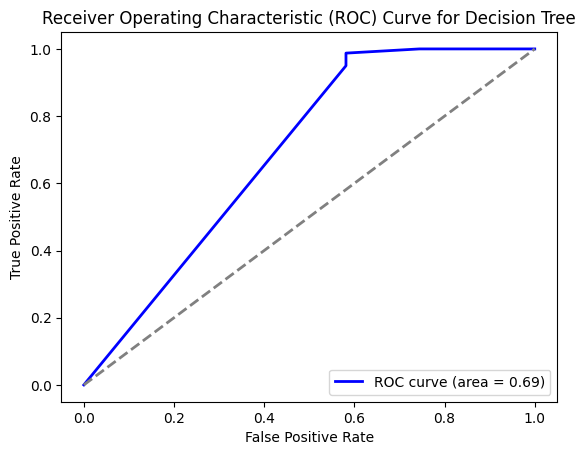

Feature Importance for Decision Tree:
              Feature  Importance
9      Credit_History    0.877069
6   CoapplicantIncome    0.062296
8    Loan_Amount_Term    0.043486
7          LoanAmount    0.008638
5     ApplicantIncome    0.008512
0              Gender    0.000000
1             Married    0.000000
2          Dependents    0.000000
3           Education    0.000000
4       Self_Employed    0.000000
10      Property_Area    0.000000


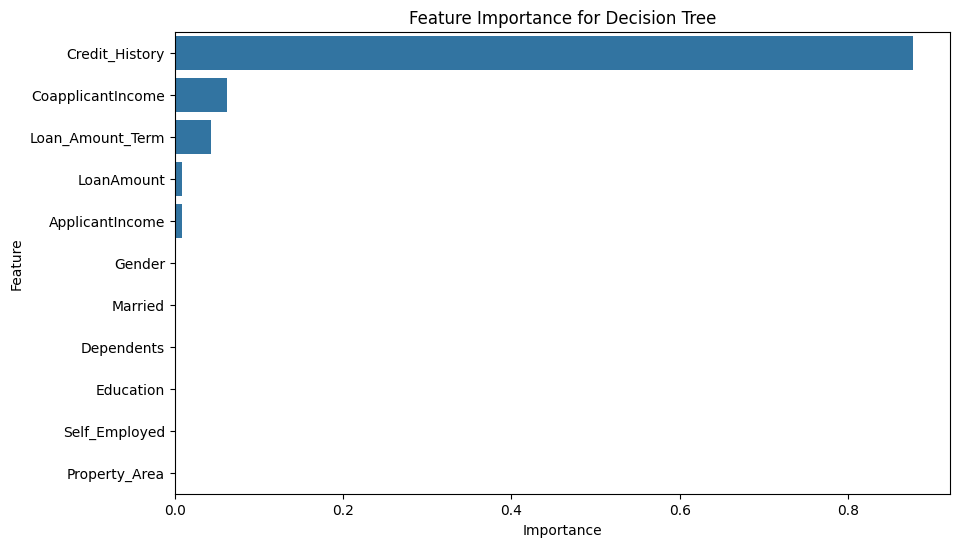

Evaluating SVM...
Accuracy: 0.7886
Precision: 0.7596
Recall: 0.9875
F1-Score: 0.8587
--------------------------------------------------


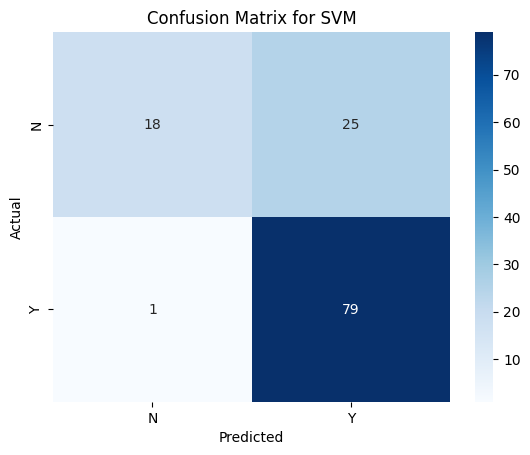

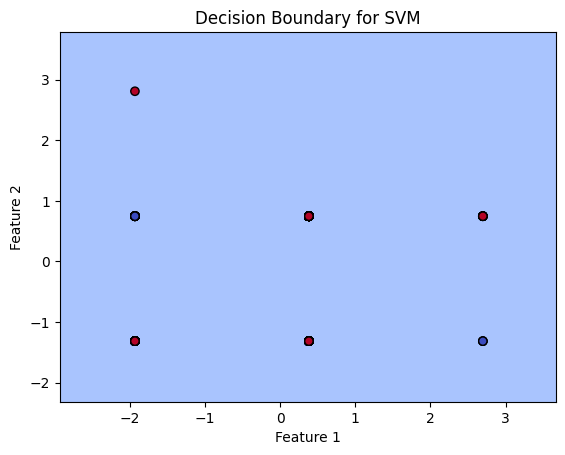

Evaluating KNN...
Accuracy: 0.7886
Precision: 0.7596
Recall: 0.9875
F1-Score: 0.8587
--------------------------------------------------


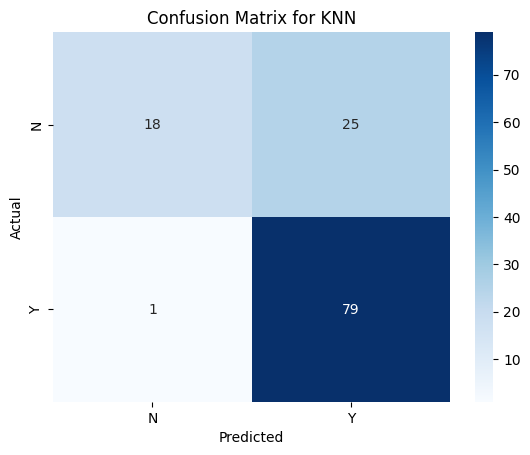

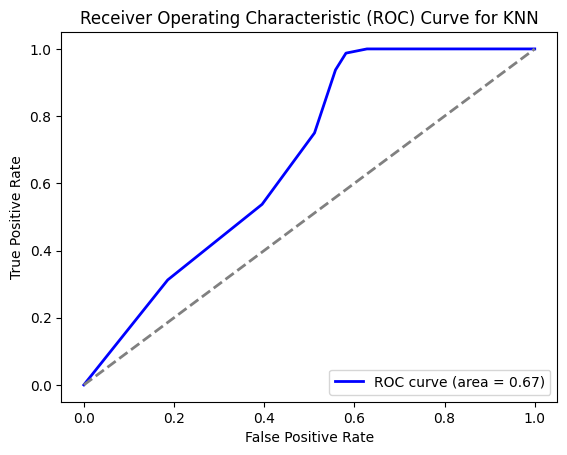

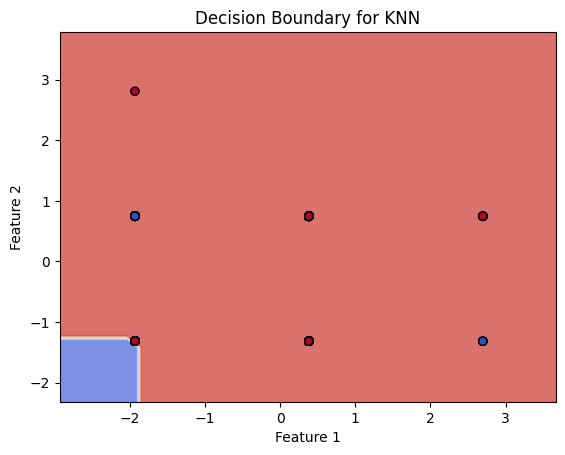

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Evaluate each model
for model_name, model in best_models.items():
    print(f"Evaluating {model_name}...")

    # Predict on the test data
    y_pred = model.predict(X_test_scaled if model_name in ['SVM', 'KNN'] else X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)  # Assuming '1' represents 'Y' (Loan Approved)
    recall = recall_score(y_test, y_pred, pos_label=1)  # Assuming '1' represents 'Y'
    f1 = f1_score(y_test, y_pred, pos_label=1)  # Assuming '1' represents 'Y'

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("-" * 50)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve (only for models that support predict_proba)
    if hasattr(model, "predict_proba"):
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled if model_name in ['SVM','KNN'] else X_test)[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model_name}')
        plt.legend(loc='lower right')
        plt.show()

    # Feature Importance (for Decision Tree)
    if model_name == 'Decision Tree':
        feature_importance = model.feature_importances_
        features = X.columns
        feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
        feature_df = feature_df.sort_values(by='Importance', ascending=False)
        print("Feature Importance for Decision Tree:")
        print(feature_df)

        # Visualize feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_df)
        plt.title('Feature Importance for Decision Tree')
        plt.show()

    # Decision Boundary Visualization (for SVM and KNN)
    if model_name in ['SVM', 'KNN']:
        # We need to take only two features for visualization
        X_train_subset = X_train_scaled[:, :2]  # Use the first two features for visualization

        # Train the model on these two features
        model.fit(X_train_subset, y_train)

        # Create a mesh grid to plot the decision boundary
        x_min, x_max = X_train_subset[:, 0].min() - 1, X_train_subset[:, 0].max() + 1
        y_min, y_max = X_train_subset[:, 1].min() - 1, X_train_subset[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

        # Predict class labels for each point in the mesh
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        # Plot the decision boundary
        plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)
        plt.scatter(X_train_subset[:, 0], X_train_subset[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
        plt.title(f'Decision Boundary for {model_name}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()
